<a href="https://colab.research.google.com/github/soyeonpark11/2020_cphys2/blob/master/hw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb

In [2]:
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)


17465344/17464789 [==============================] - 0s 0us/step


In [3]:
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

In [4]:
X_train=vect(X)
X_test=vect(X_test)

In [5]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
118/118 [==============================] - 2s 14ms/step - loss: 0.5766 - acc: 0.6930 - val_loss: 0.3823 - val_acc: 0.8712
Epoch 2/5
118/118 [==============================] - 1s 12ms/step - loss: 0.3854 - acc: 0.8415 - val_loss: 0.2886 - val_acc: 0.8900
Epoch 3/5
118/118 [==============================] - 2s 13ms/step - loss: 0.3003 - acc: 0.8895 - val_loss: 0.2860 - val_acc: 0.8810
Epoch 4/5
118/118 [==============================] - 2s 13ms/step - loss: 0.2513 - acc: 0.9097 - val_loss: 0.2854 - val_acc: 0.8850
Epoch 5/5
118/118 [==============================] - 1s 12ms/step - loss: 0.2119 - acc: 0.9211 - val_loss: 0.2891 - val_acc: 0.8852


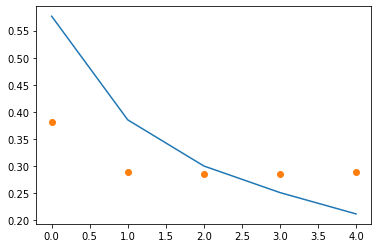

In [7]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [8]:

test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3073 - acc: 0.8775



IMDB Classification using simple RNN

In [29]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)
max_features = 10000 
maxlen = 100 
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [53]:
X_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194, 7486,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30, 5535,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16, 5345,   19,  178,
         32], dtype=int32)

In [59]:
from keras.layers import Dense
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 32))
rnn.add(layers.SimpleRNN(32))
rnn.add(layers.Dropout(0.2))
rnn.add(Dense(1, activation='sigmoid'))
rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [60]:
rnn.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_16 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [61]:
history = rnn.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 25s 161ms/step - loss: 0.6149 - acc: 0.6467 - val_loss: 0.4979 - val_acc: 0.7630
Epoch 2/10
157/157 [==============================] - 23s 150ms/step - loss: 0.3747 - acc: 0.8450 - val_loss: 0.3643 - val_acc: 0.8518
Epoch 3/10
157/157 [==============================] - 22s 141ms/step - loss: 0.2988 - acc: 0.8817 - val_loss: 0.3699 - val_acc: 0.8584
Epoch 4/10
157/157 [==============================] - 22s 143ms/step - loss: 0.2467 - acc: 0.9063 - val_loss: 0.3745 - val_acc: 0.8586
Epoch 5/10
157/157 [==============================] - 21s 135ms/step - loss: 0.1796 - acc: 0.9343 - val_loss: 0.3782 - val_acc: 0.8564
Epoch 6/10
157/157 [==============================] - 21s 135ms/step - loss: 0.1362 - acc: 0.9505 - val_loss: 0.4570 - val_acc: 0.8256
Epoch 7/10
157/157 [==============================] - 21s 137ms/step - loss: 0.1014 - acc: 0.9656 - val_loss: 0.4487 - val_acc: 0.8400
Epoch 8/10
157/157 [==============================] - 2

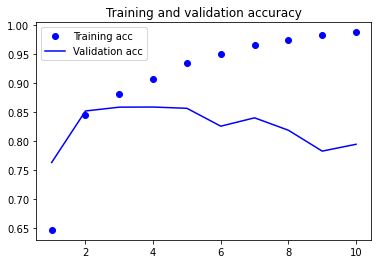

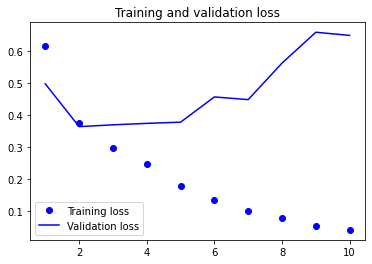

In [62]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [63]:

preds = rnn.predict(input_test[100:105])

In [64]:
preds

array([[0.00388882],
       [0.01088202],
       [0.10429987],
       [0.01232451],
       [0.00312734]], dtype=float32)

In [65]:
y_test[100:105]

array([1, 1, 0, 0, 0])

In [66]:

print(preds.shape)
p = np.around(preds).astype(np.int64)
p

z = y_test[100:105] - p.transpose()
print(z)
np.count_nonzero(z)

(5, 1)
[[1 1 0 0 0]]


2

In [67]:
predsAll = rnn.predict(input_test) 
p = np.around(predsAll).astype(np.int64)

z = y_test - p.transpose() 
print(len(z[0])) 
flse = np.count_nonzero(z) 
print('Test set accuracy = ', 100 - flse/len(z[0])*100, '%')

25000
Test set accuracy =  80.48400000000001 %
